In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
db = pd.read_csv('MapsResultsIntegrity.csv')
db

,State Name,NumberDIstricts,Cluster_Avg_Distance,District_Avg_Distance,District-Cluster Difference,State,Integrity Index,Public Access to Information,Political Financing,Executive Accountability,...,Judicial Accountability,State Budget Processes,State Civil Service Management,Procurement,Internal Auditing,Lobbying Disclosure,State Pension Fund Management,Ethics Enforcement Agencies,State Insurance Commissions,Redistricting
0,Alabama,7,60840.42103,69162.93535,8322.51432,1,71.774636,56.944444,43.940146,76.333333,...,80.116071,75.138889,86.309524,89.285714,93.750000,71.180556,64.672619,77.951389,88.888889,40
1,Arizona,9,53998.42873,74140.02983,20141.60110,4,68.060032,77.777778,67.303241,73.611111,...,80.267857,75.277778,54.851190,69.642857,85.416667,57.291667,39.494048,55.295139,52.777778,95
2,Arkansas,4,80936.14729,86976.05993,6039.91264,5,68.262590,54.166667,65.874669,73.222222,...,70.276786,73.750000,61.964286,80.357143,92.708333,73.611111,42.529762,74.479167,60.069444,65
3,California,53,20231.82632,33065.68108,12833.85476,6,80.801516,61.111111,80.491071,83.388889,...,71.360119,72.361111,77.529762,87.500000,91.666667,91.666667,74.375000,83.506944,81.597222,100
4,Colorado,7,45188.78001,58745.98835,13557.20834,8,66.945590,33.333333,75.254630,77.333333,...,76.151786,89.305556,56.934524,83.035714,89.583333,72.222222,52.142857,34.288194,57.986111,70
5,Connecticut,5,22599.03188,26291.51755,3692.48567,9,86.415320,88.888889,96.056548,79.305556,...,69.681548,85.555556,77.708333,91.071429,90.625000,84.027778,90.178571,90.451389,89.930556,100
6,Florida,27,27027.02933,45458.66308,18431.63375,12,71.337349,66.666667,60.577050,70.861111,...,61.208333,73.055556,61.250000,83.035714,95.833333,65.277778,64.255952,56.076389,69.791667,100
7,Georgia,14,42651.09907,56391.68703,13740.58796,13,49.079554,45.833333,57.958003,62.222222,...,71.556548,63.611111,24.553571,65.178571,85.416667,54.513889,23.005952,0.000000,31.597222,45
8,Hawaii,2,96806.97003,102291.48470,5484.51467,15,73.630882,65.277778,85.699405,79.111111,...,67.264881,64.027778,65.982143,88.392857,91.666667,62.500000,68.125000,74.826389,57.291667,90
9,Idaho,2,179234.96520,200285.23600,21050.27080,16,61.122331,72.222222,75.152116,52.444444,...,61.348214,79.166667,40.386905,80.357143,89.583333,78.472222,32.023810,0.000000,47.222222,100


In [3]:
y_names = db.keys()[6:]
y_names

Index([u'Integrity Index', u'Public Access to Information', u'Political Financing', u'Executive Accountability', u'Legislative Accountability', u'Judicial Accountability', u'State Budget Processes', u'State Civil Service Management', u'Procurement', u'Internal Auditing', u'Lobbying Disclosure', u'State Pension Fund Management', u'Ethics Enforcement Agencies', u'State Insurance Commissions', u'Redistricting'], dtype='object')

                            OLS Regression Results                            
Dep. Variable:        Integrity Index   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     3.968
Date:                Sat, 23 May 2015   Prob (F-statistic):             0.0268
Time:                        15:45:17   Log-Likelihood:                -147.29
No. Observations:                  43   AIC:                             300.6
Df Residuals:                      40   BIC:                             305.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
const             

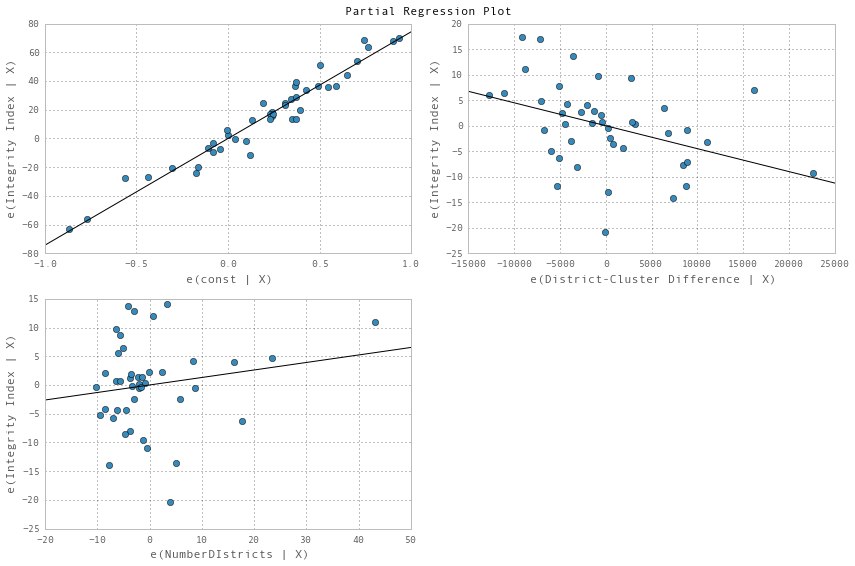

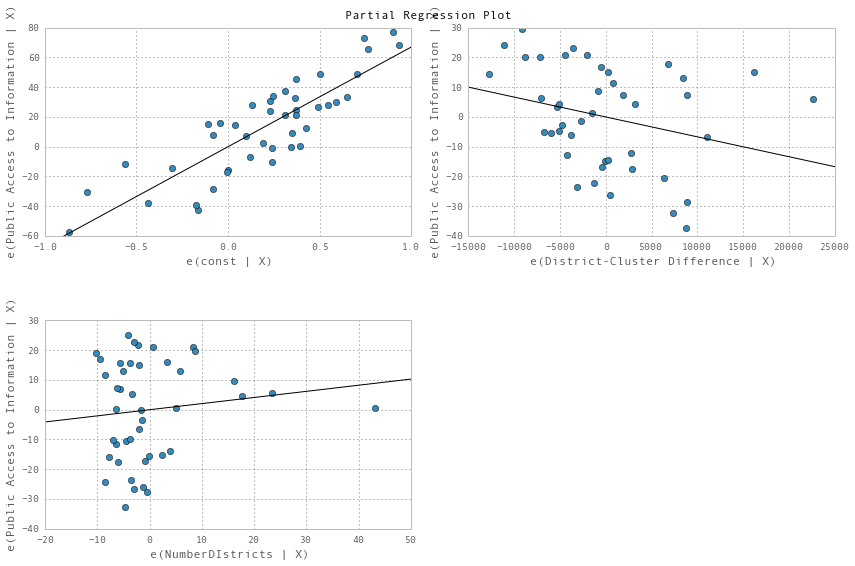

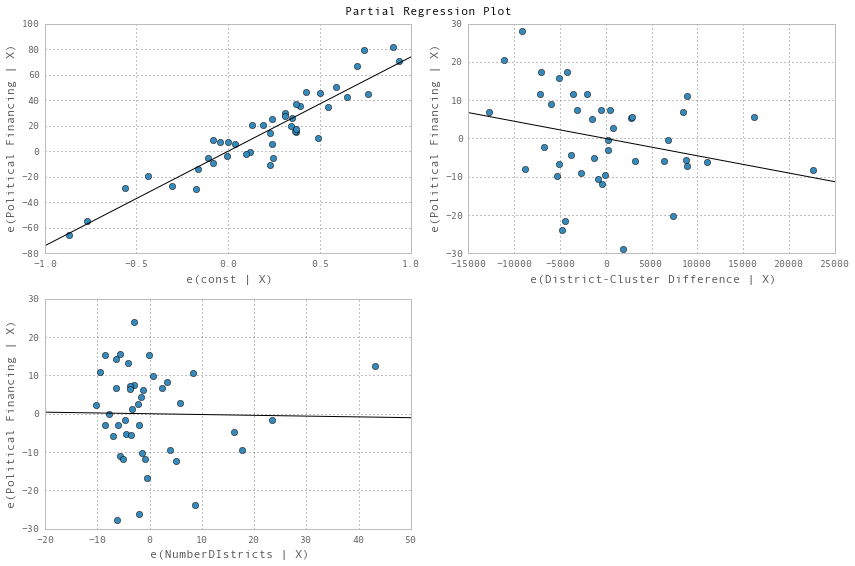

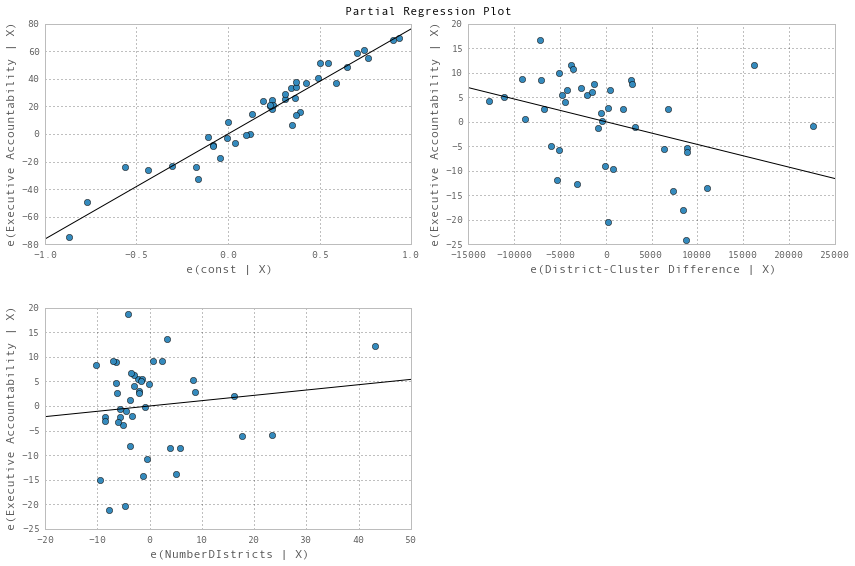

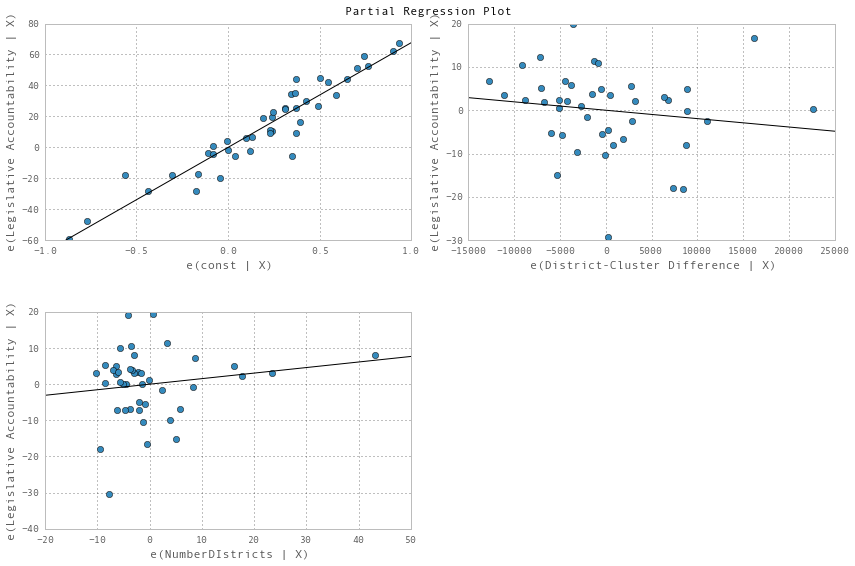

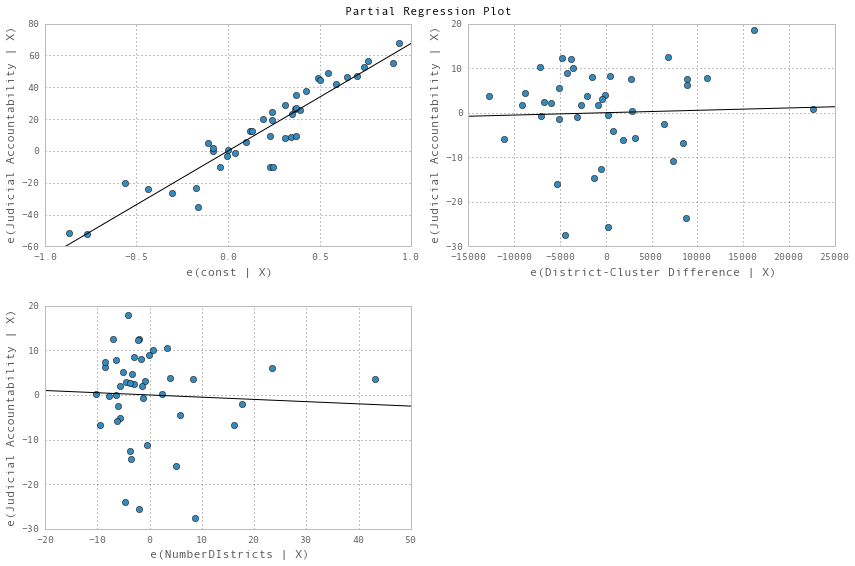

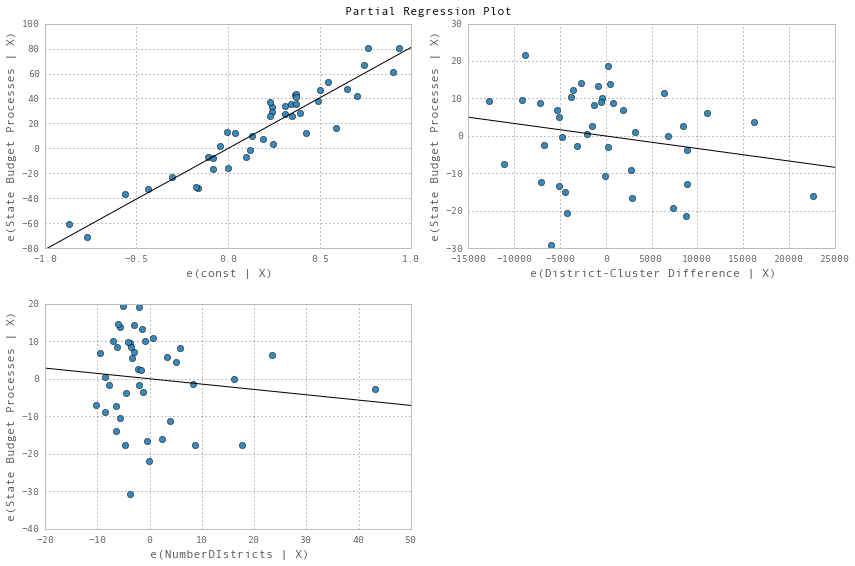

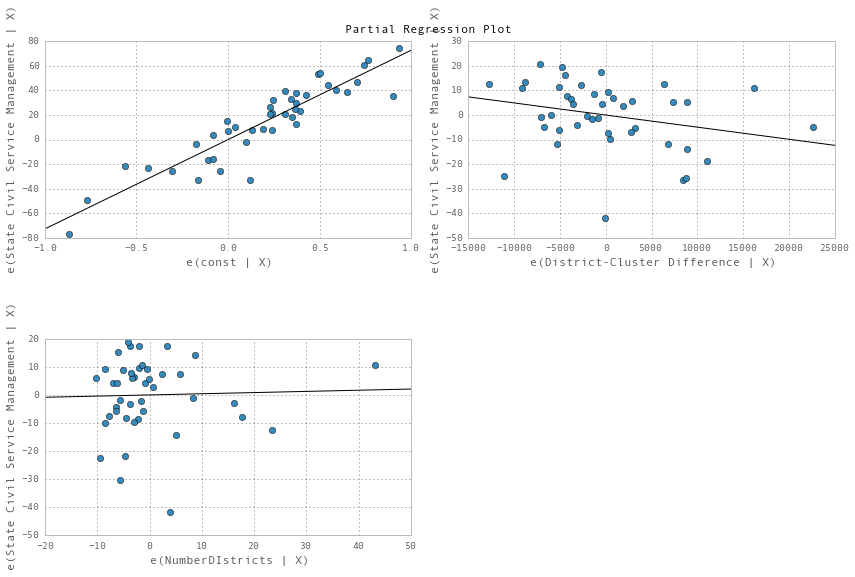

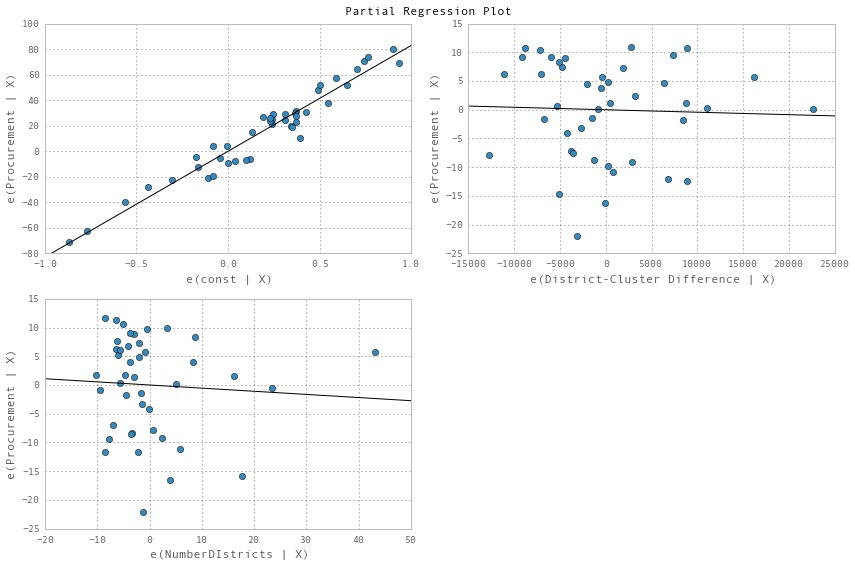

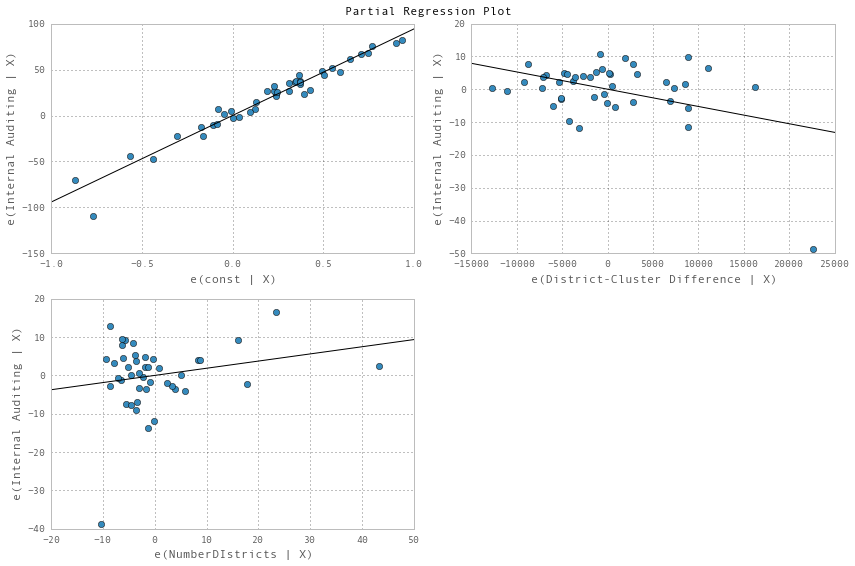

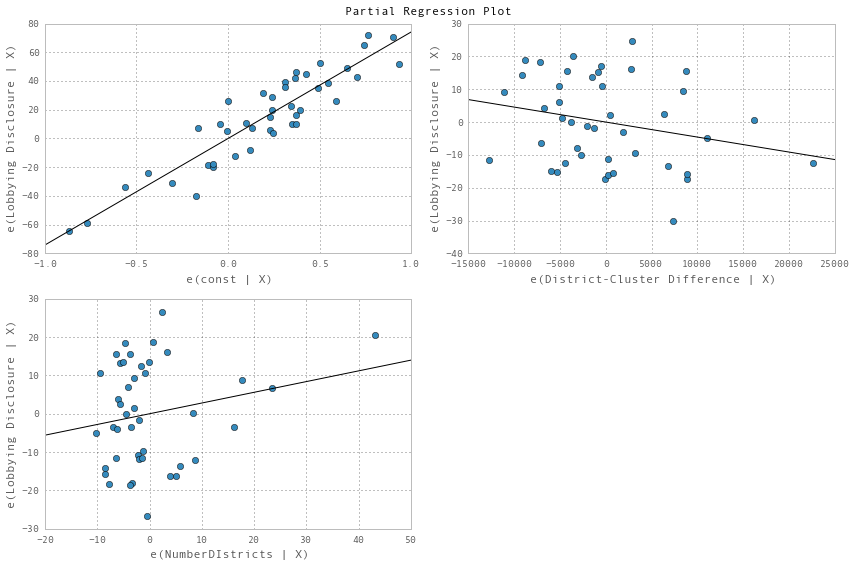

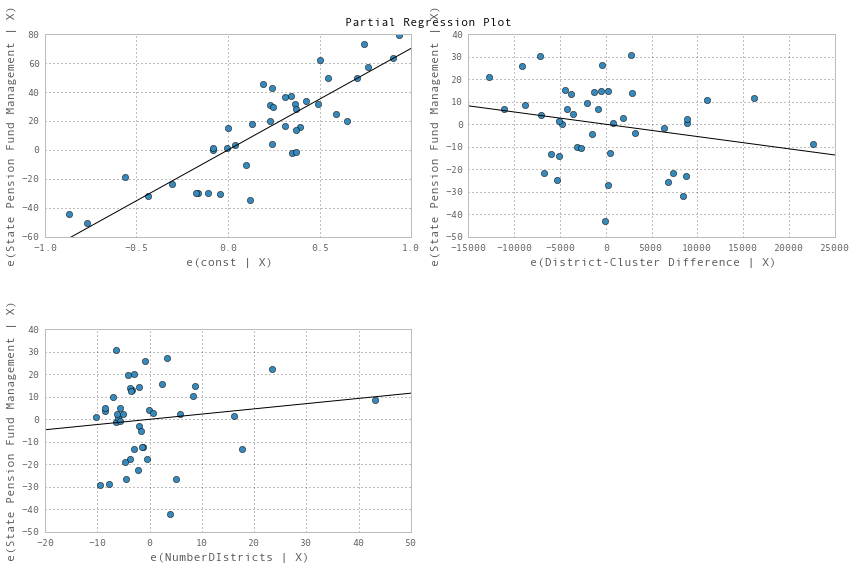

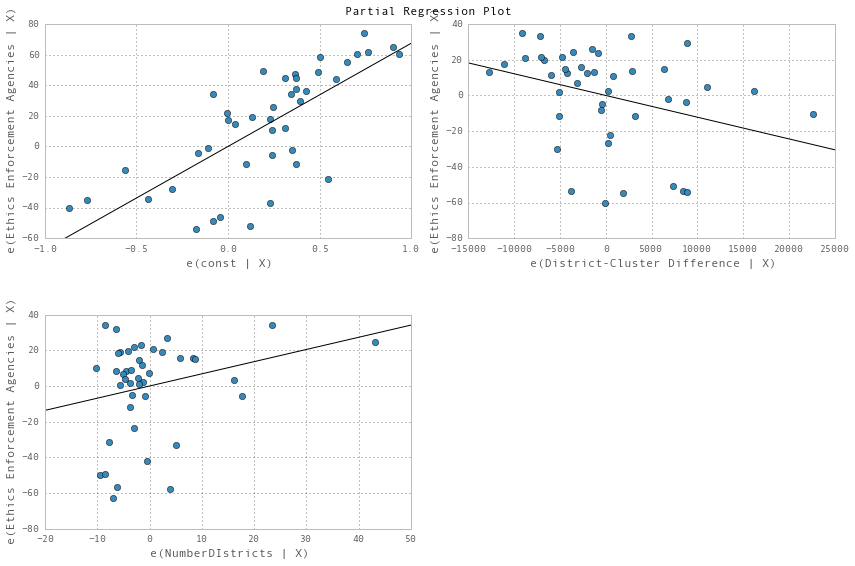

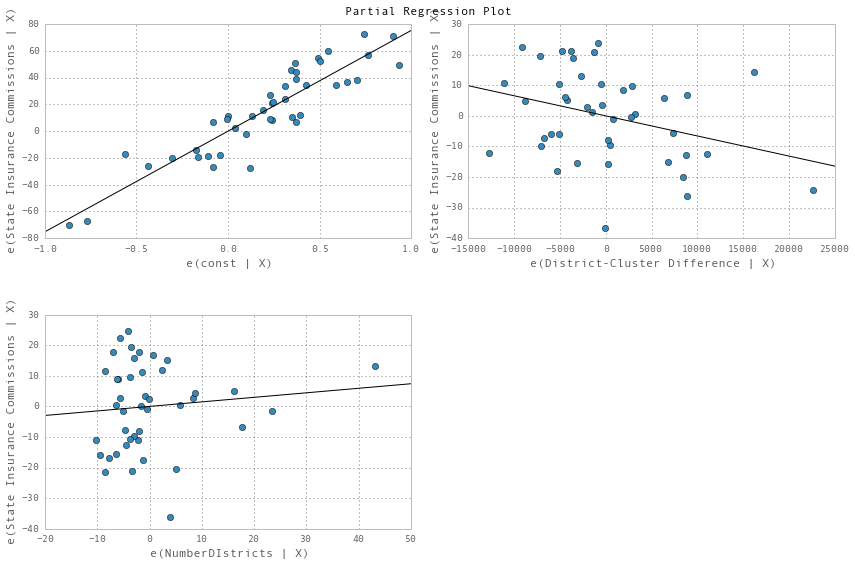

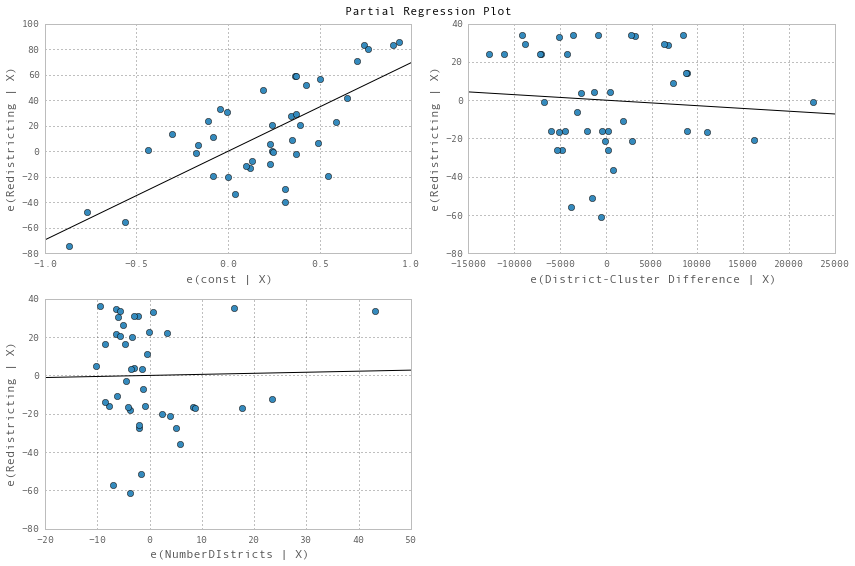

In [4]:
X = db[['District-Cluster Difference','NumberDIstricts']]
X = sm.add_constant(X)
for var in y_names:
    Y = db[var]
    model = sm.OLS(Y,X)
    res = model.fit()
    print res.summary()
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(res, fig=fig)

In [5]:
import scipy.stats as stats
X = db['District-Cluster Difference']
res = {}
for var in y_names:
    Y = db[var]
    tmp = stats.spearmanr(X,Y)
    res[var] = tmp
res_DF = pd.DataFrame(res, index=['rho','p-val'])
res_DF.transpose()

,rho,p-val
Ethics Enforcement Agencies,-0.347905,0.022250
Executive Accountability,-0.383886,0.011043
Integrity Index,-0.409846,0.006345
Internal Auditing,-0.075759,0.629209
Judicial Accountability,-0.059499,0.704689
Legislative Accountability,-0.251482,0.103791
Lobbying Disclosure,-0.199600,0.199403
Political Financing,-0.260948,0.090998
Procurement,-0.129296,0.408610
Public Access to Information,-0.317213,0.038202


                            OLS Regression Results                            
Dep. Variable:        Integrity Index   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     2.677
Date:                Sat, 23 May 2015   Prob (F-statistic):             0.0604
Time:                        15:45:51   Log-Likelihood:                -147.15
No. Observations:                  43   AIC:                             302.3
Df Residuals:                      39   BIC:                             309.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
const             

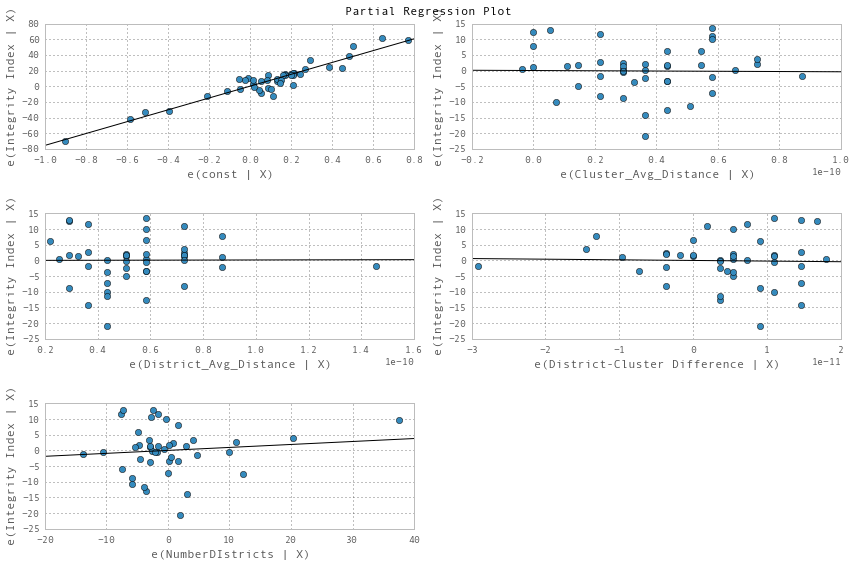

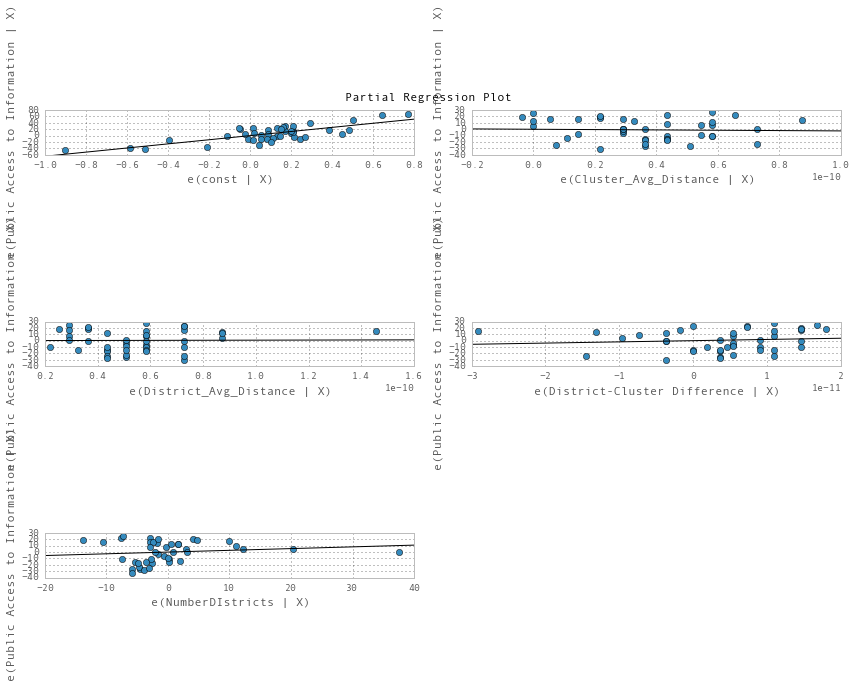

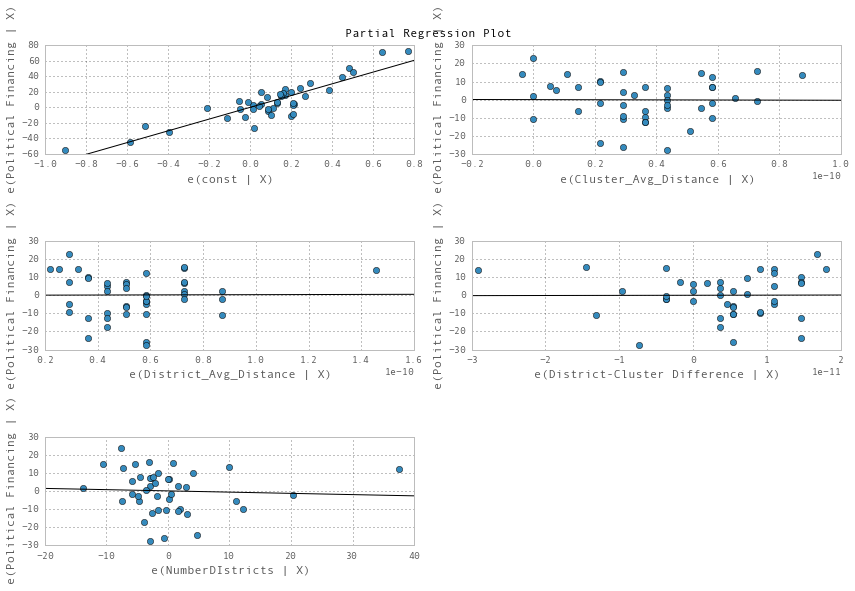

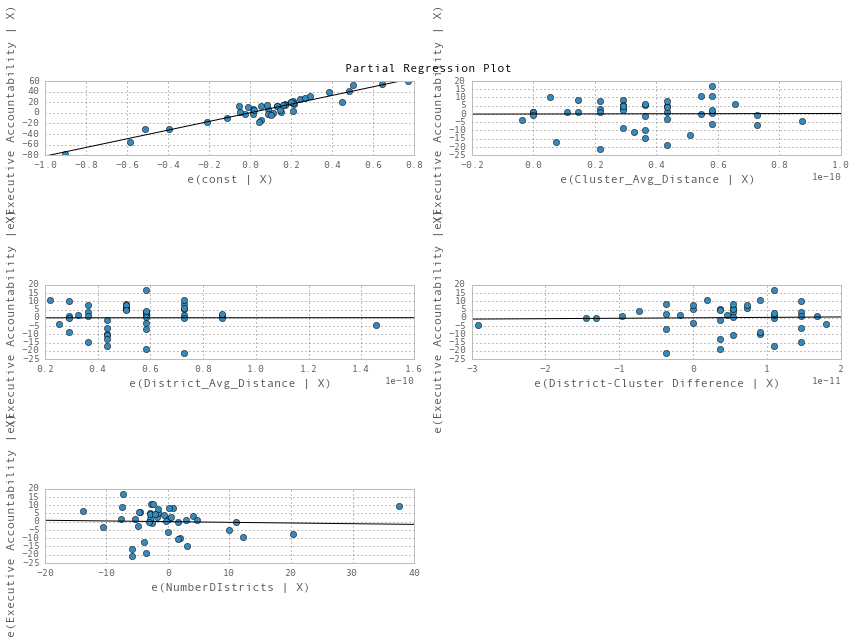

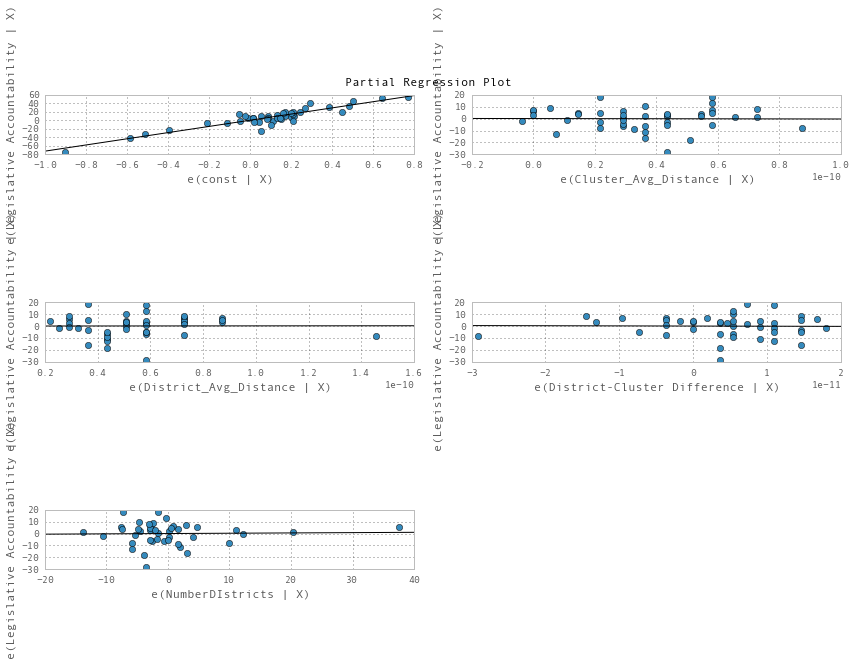

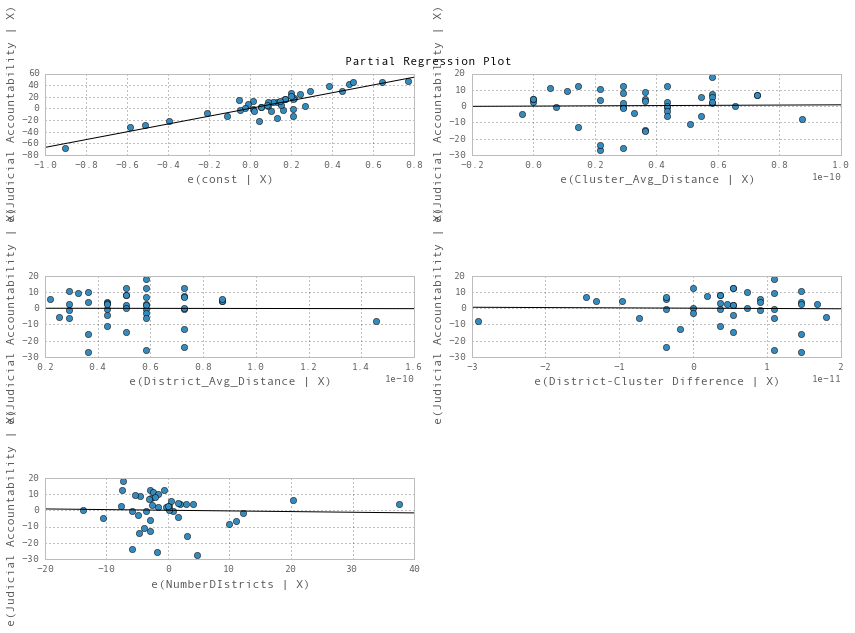

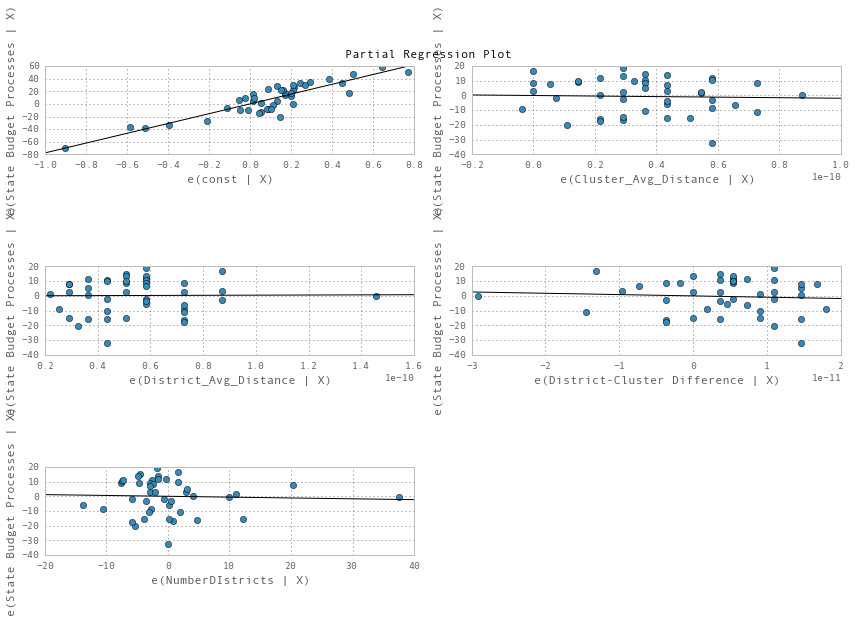

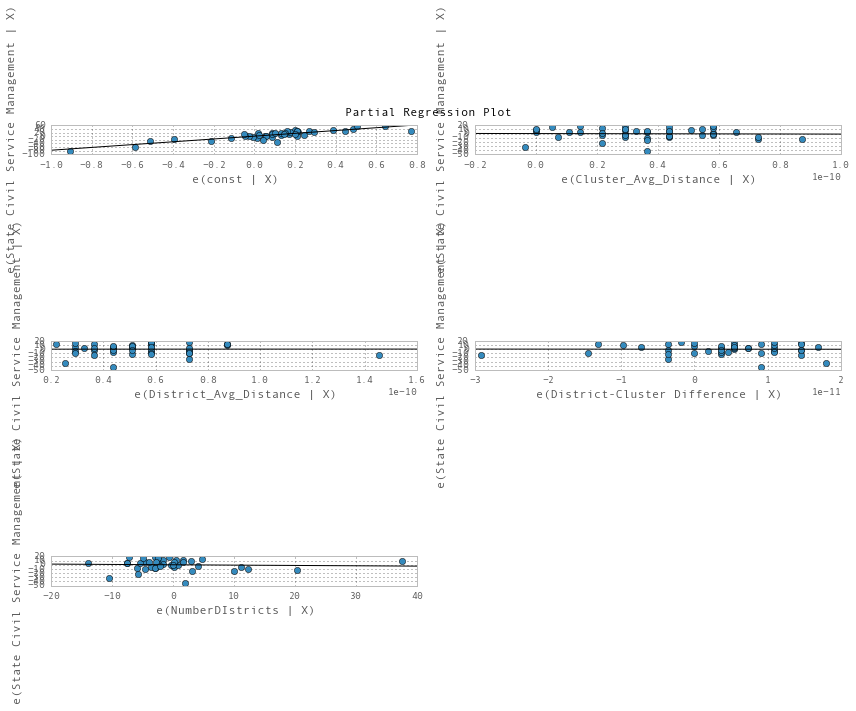

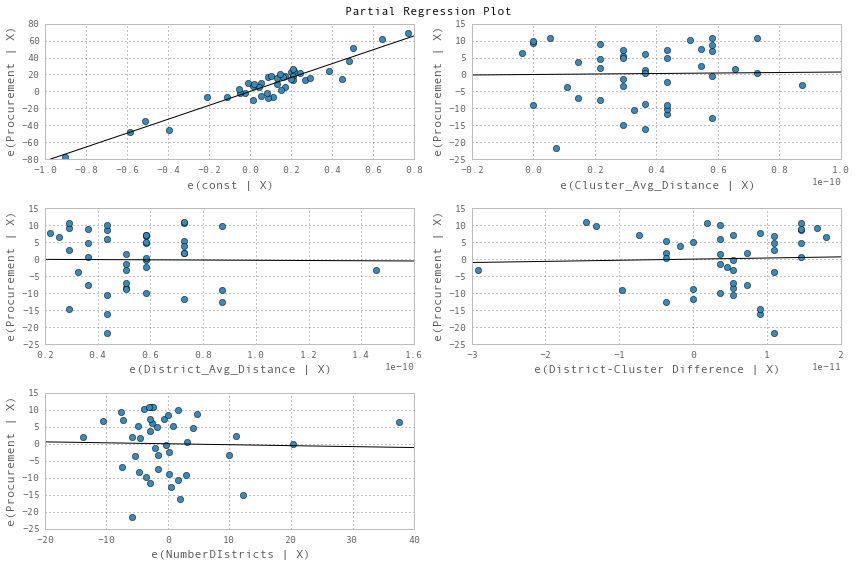

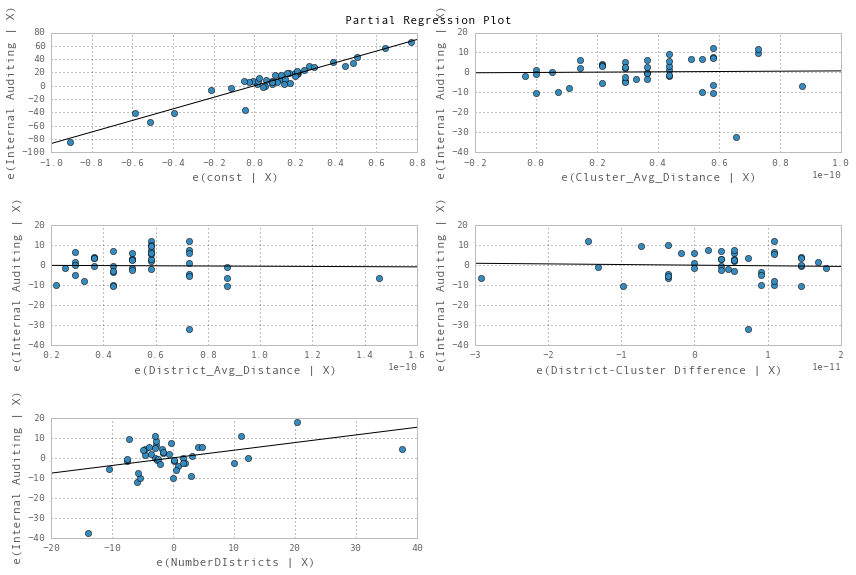

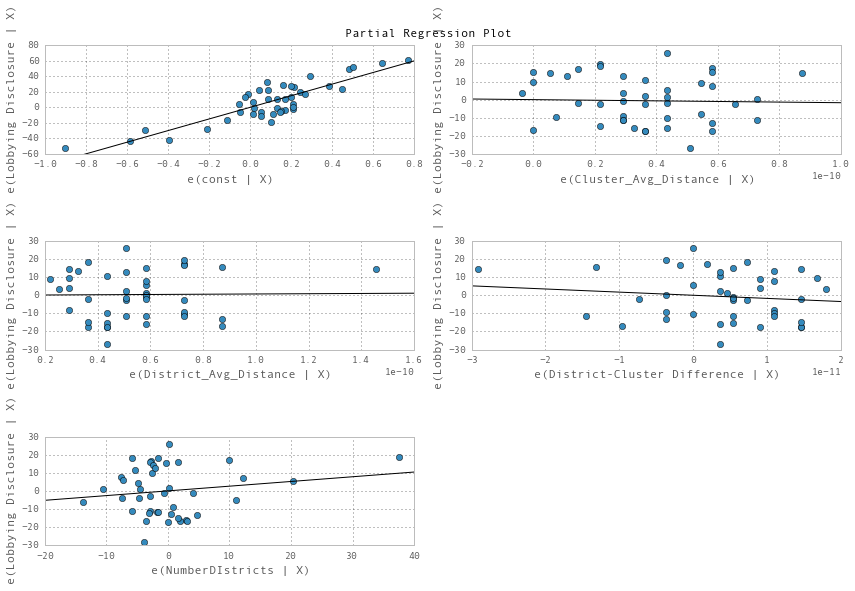

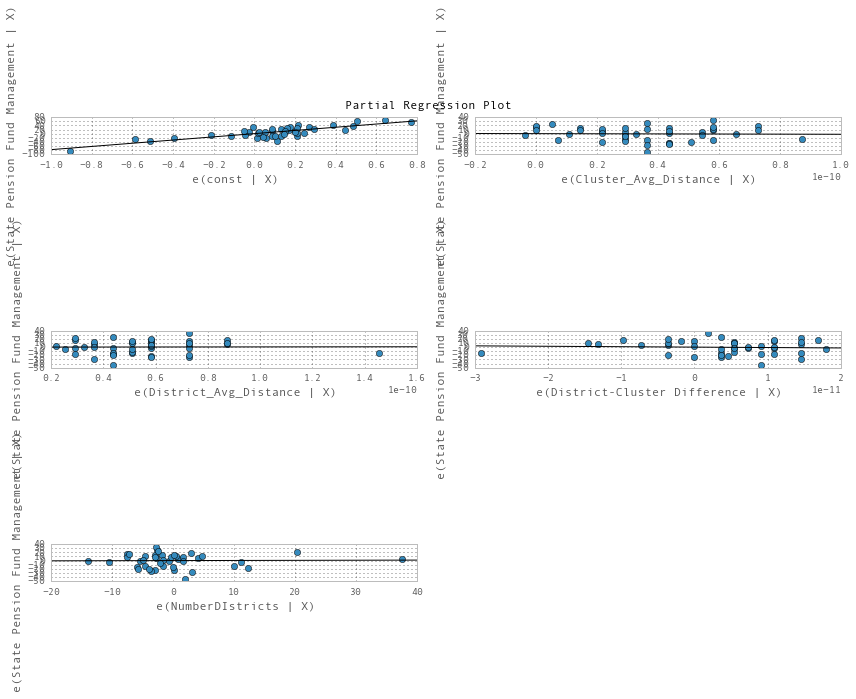

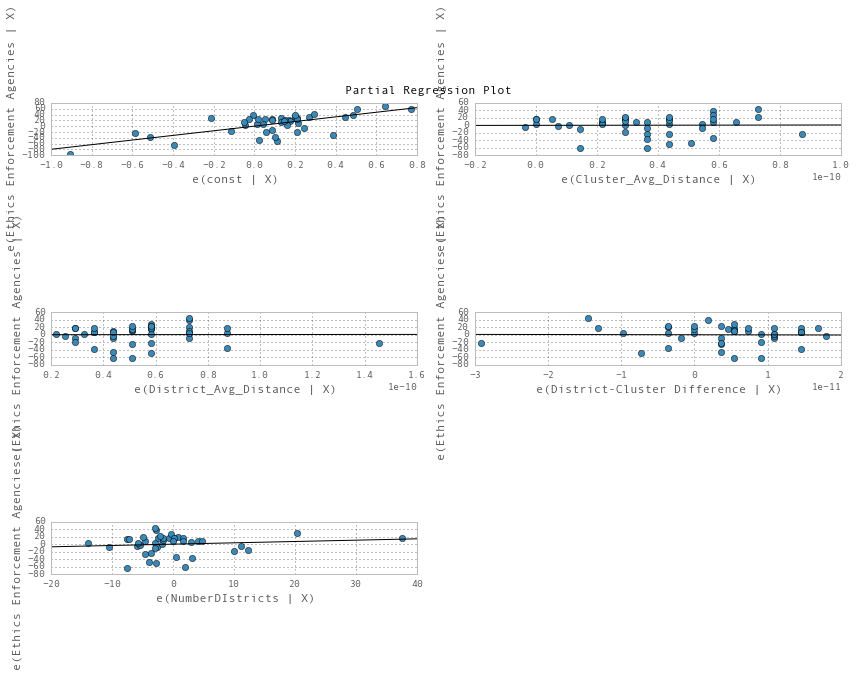

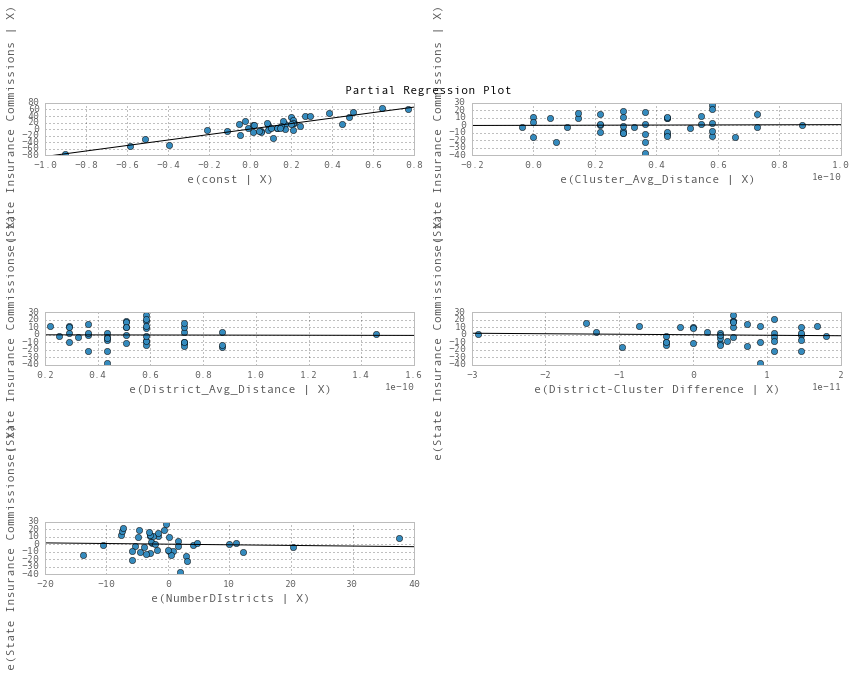

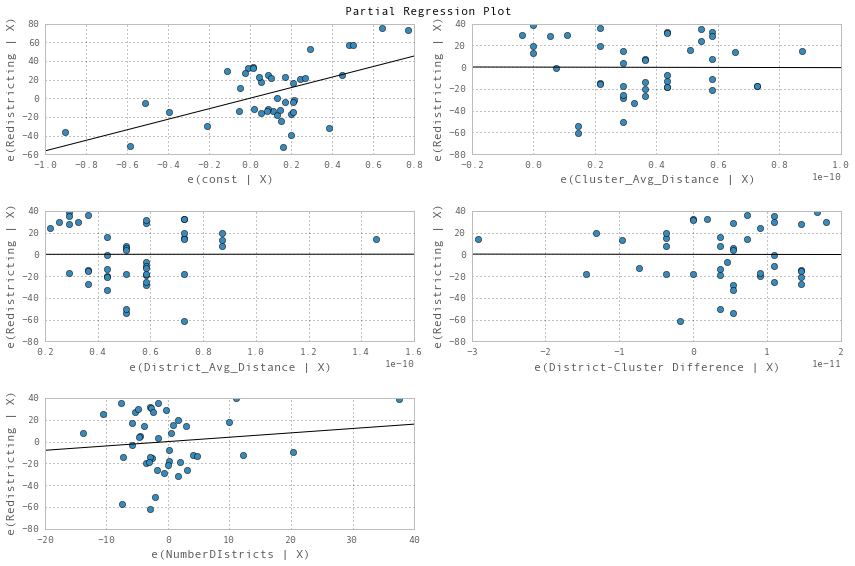

In [6]:
X = db[['Cluster_Avg_Distance', 'District_Avg_Distance', 'District-Cluster Difference','NumberDIstricts']]
X = sm.add_constant(X)
for var in y_names:
    Y = db[var]
    model = sm.OLS(Y,X)
    res = model.fit()
    print res.summary()
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(res, fig=fig)

## Our clustering Spearman correlations

In [7]:
X = db['Cluster_Avg_Distance']
res = {}
for var in y_names:
    Y = db[var]
    tmp = stats.spearmanr(X,Y)
    res[var] = tmp
res_DF = pd.DataFrame(res, index=['rho','p-val'])
res_DF.transpose()

,rho,p-val
Ethics Enforcement Agencies,-0.165414,0.289122
Executive Accountability,-0.232793,0.133027
Integrity Index,-0.151314,0.332752
Internal Auditing,0.255507,0.098194
Judicial Accountability,0.062217,0.691850
Legislative Accountability,-0.149605,0.338303
Lobbying Disclosure,-0.220745,0.154885
Political Financing,-0.144216,0.356185
Procurement,0.077577,0.620977
Public Access to Information,-0.156038,0.317701


## Actual districting Spearman correlationa

In [8]:
X = db['District_Avg_Distance']
res = {}
for var in y_names:
    Y = db[var]
    tmp = stats.spearmanr(X,Y)
    res[var] = tmp
res_DF = pd.DataFrame(res, index=['rho','p-val'])
res_DF.transpose()

,rho,p-val
Ethics Enforcement Agencies,-0.181131,0.245072
Executive Accountability,-0.297957,0.052307
Integrity Index,-0.192842,0.215362
Internal Auditing,0.226066,0.144930
Judicial Accountability,0.059650,0.703974
Legislative Accountability,-0.153683,0.325147
Lobbying Disclosure,-0.231771,0.134787
Political Financing,-0.163546,0.294677
Procurement,0.076670,0.625079
Public Access to Information,-0.165105,0.290035
